In [20]:
import pandas as pd

In [21]:
data1 = pd.read_csv("random_data.csv")
data2 = pd.read_csv("random_data_2.csv")
data3 = pd.read_csv("random_data_3.csv")

# Kontrollera för saknade värden, dubbletter och extremvärden.

In [22]:
def check_missing_values(data):
    return data.isnull().sum()

print("Missing values in dataset 1:")
print(check_missing_values(data1))
print("Missing values in dataset 2:")
print(check_missing_values(data2))
print("Missing values in dataset 3:")
print(check_missing_values(data3))

Missing values in dataset 1:
feature_1    0
feature_2    0
target       0
dtype: int64
Missing values in dataset 2:
feature_1    0
feature_2    0
target       0
dtype: int64
Missing values in dataset 3:
Unnamed: 0     0
feature_1     50
feature_2     49
target         0
dtype: int64


In [23]:
def check_duplicates(data):
    return data.duplicated().sum()

print("Duplicates in dataset 1:")
print(check_duplicates(data1))
print("Duplicates in dataset 2:")
print(check_duplicates(data2))
print("Duplicates in dataset 3:")
print(check_duplicates(data3))


Duplicates in dataset 1:
0
Duplicates in dataset 2:
500
Duplicates in dataset 3:
0


In [24]:
def check_extreme_values(data):
    min_values = data.min()
    max_values = data.max()
    extreme_values = pd.DataFrame({'min': min_values, 'max': max_values})
    print(extreme_values)  
    return extreme_values


In [25]:
def feature_ranges(data):
    extreme_values = check_extreme_values(data)
    min_values = extreme_values.loc['min'] if 'min' in extreme_values.index else extreme_values.min()
    max_values = extreme_values.loc['max'] if 'max' in extreme_values.index else extreme_values.max()
    ranges = max_values - min_values
    return ranges

ranges1 = feature_ranges(data1)
ranges2 = feature_ranges(data2)
ranges3 = feature_ranges(data3)

print("Ranges in dataset 1:")
print(ranges1)
print("Ranges in dataset 2:")
print(ranges2)
print("Ranges in dataset 3:")
print(ranges3)

total_ranges1 = ranges1.sum()
total_ranges2 = ranges2.sum()
total_ranges3 = ranges3.sum()

least_extreme_values_dataset = min((total_ranges1, "Dataset 1"), (total_ranges2, "Dataset 2"), (total_ranges3, "Dataset 3"))

print("Dataset with least extreme values:")
print(least_extreme_values_dataset[1])

                min       max
feature_1 -3.650544  1.992686
feature_2 -3.187975  2.372060
target     0.000000  1.000000
                min       max
feature_1 -2.972555  1.992686
feature_2 -3.187975  2.344732
target     0.000000  1.000000
                 min         max
Unnamed: 0  0.000000  999.000000
feature_1  -3.650544    1.992686
feature_2  -3.187975    2.372060
target      0.000000    1.000000
Ranges in dataset 1:
min    3.650544
max    1.372060
dtype: float64
Ranges in dataset 2:
min    3.187975
max    1.344732
dtype: float64
Ranges in dataset 3:
min      3.650544
max    998.000000
dtype: float64
Dataset with least extreme values:
Dataset 2


# Välj det dataset som du anser vara av högst kvalitet.

Jag väljer att använda random_data.csv då den inte saknar några värden,den har inte några dubletter och inga extrema värden.

# Plotta datan med klasserna i olika färger:

In [26]:
print(data1.head())


   feature_1  feature_2  target
0   0.811586   1.977330       1
1  -0.283428  -1.368891       0
2  -0.281272   0.858368       1
3   0.617176   1.293528       1
4   1.080526   0.815136       1


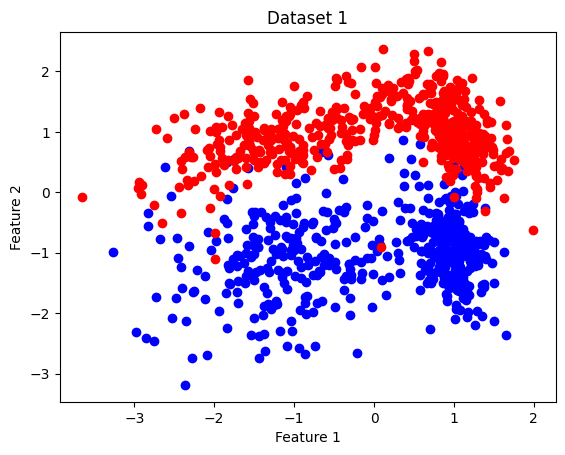

In [27]:
import matplotlib.pyplot as plt

def plot_data(data, title):
    plt.scatter(data[data['target'] == 0]['feature_1'], data[data['target'] == 0]['feature_2'], color='blue')
    plt.scatter(data[data['target'] == 1]['feature_1'], data[data['target'] == 1]['feature_2'], color='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_data(data1, 'Dataset 1')

In [28]:
print(data1[['feature_1', 'feature_2', 'target']])

     feature_1  feature_2  target
0     0.811586   1.977330       1
1    -0.283428  -1.368891       0
2    -0.281272   0.858368       1
3     0.617176   1.293528       1
4     1.080526   0.815136       1
..         ...        ...     ...
995  -1.550147   0.769101       1
996  -1.834872  -2.243535       0
997  -0.421229   0.408860       1
998   1.055574   0.833754       1
999   0.735994  -1.441675       0

[1000 rows x 3 columns]


# Ser det ut som att det är möjligt att skapa en bra klassificering?

Kolumnerna "feature_1" och "feature_2" har både positiva och negativa värden så de kan ha någon försutsägande kraft för att särskilja mellan de två klasserna. 
I plottningen ser det ut att vara en bra separation också.
Baserat på dessa observationer tycker jag det är möjligt att en bra klassificerings modell kan skapas.

# Träna en Support Vector Machine med linjär kernel:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = data1[['feature_1', 'feature_2']]
y = data1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)
print(f"Train Score {train_score}")
print(f"Test score: {test_score}")


Train Score 0.9475
Test score: 0.985


# Rita åter ut datan, men med hyperplanet för din SVM
# ○ Rita ut hyperplanet med testdata


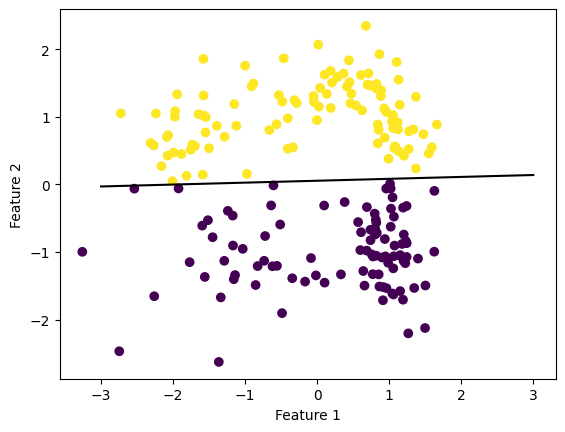

In [30]:
import numpy as np
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (svc.intercept_[0]) / w[1]

test_pred = svc.predict(X_test)

plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_pred)
plt.plot(xx, yy, 'k-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# VG

# Analysera random_data_3d.csv

In [31]:
data3d = pd.read_csv("random_data_3d.csv")

# Saknas värden?

# Kolla efter missing values

In [32]:
def check_missing_values(data):
    return data.isnull().sum()

print("Missing values in dataset 1:")
print(check_missing_values(data3d))

Missing values in dataset 1:
feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64


# Kolla efter dubletter

In [33]:
def check_duplicates(data):
    return data.duplicated().sum()

print("Duplicates in dataset 1:")
print(check_duplicates(data3d))

Duplicates in dataset 1:
0


# Kolla efter extremvärden

In [34]:
def feature_ranges(data):
    extreme_values = check_extreme_values(data)
    min_values = extreme_values.loc['min'] if 'min' in extreme_values.index else extreme_values.min()
    max_values = extreme_values.loc['max'] if 'max' in extreme_values.index else extreme_values.max()
    ranges = max_values - min_values
    return ranges

ranges1 = feature_ranges(data3d)


print("Ranges in dataset 1:")
print(ranges1)

total_ranges1 = ranges1.sum()



                min       max
feature_1 -2.458991  2.365007
feature_2 -2.718469  2.753076
feature_3 -2.374036  3.362534
target     0.000000  1.000000
Ranges in dataset 1:
min    2.718469
max    2.362534
dtype: float64


In [35]:
data3d.columns

Index(['feature_1', 'feature_2', 'feature_3', 'target'], dtype='object')

# Kolla efter outliers

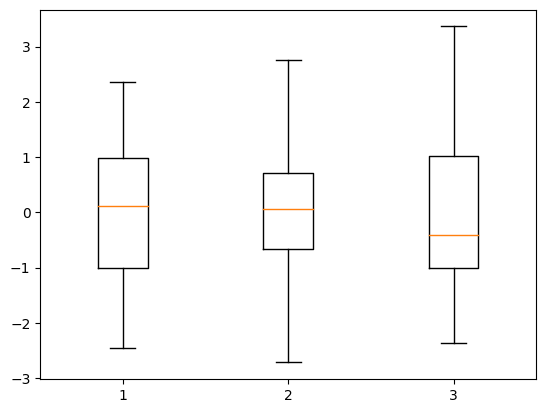

Outliers:
Empty DataFrame
Columns: [feature_1, feature_2, feature_3, target]
Index: []


In [36]:
# Skapa boxplot för alla variabler
plt.boxplot([data3d['feature_1'], data3d['feature_2'], data3d['feature_3']])

# Visa boxplot
plt.show()

# Ta fram IQR för varje variabel
q1 = data3d.quantile(0.25)
q3 = data3d.quantile(0.75)
iqr = q3 - q1

# Definiera gränser för outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Ta fram outliers i varje variabel
outliers = data3d[((data3d < lower_bound) | (data3d > upper_bound)).any(axis=1)]

# Visa outliers
print("Outliers:")
print(outliers)


# Rita ut all data (med klasserna i olika färger)

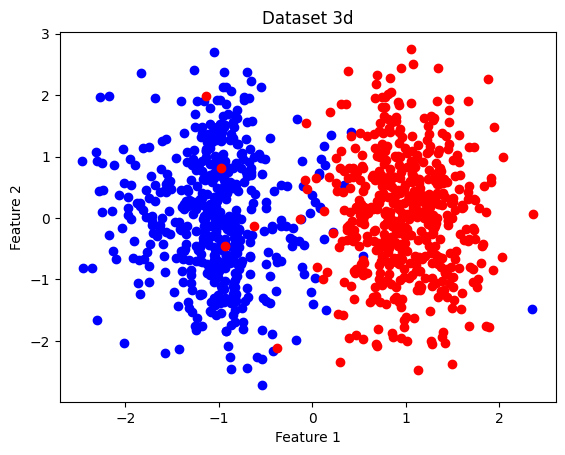

In [37]:
plot_data(data3d, 'Dataset 3d')

# Träna en Support Vector Machine

In [38]:
# Antag att data1 är det bästa datasetet
X = data3d[['feature_1', 'feature_2', 'feature_3']]
y = data3d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

#y_pred = svc.predict(X_test)
train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)
print(f"Train Score {train_score}")
print(f"Test score: {test_score}")
test_pred = svc.predict(X_test)

Train Score 0.97375
Test score: 0.975


# Vad får modellen för testscore?

Test scoren blir 0,975

# Rita åter ut datan, men med hyperplanet för din SVM
# ○ Rita ut hyperplanet med testdata

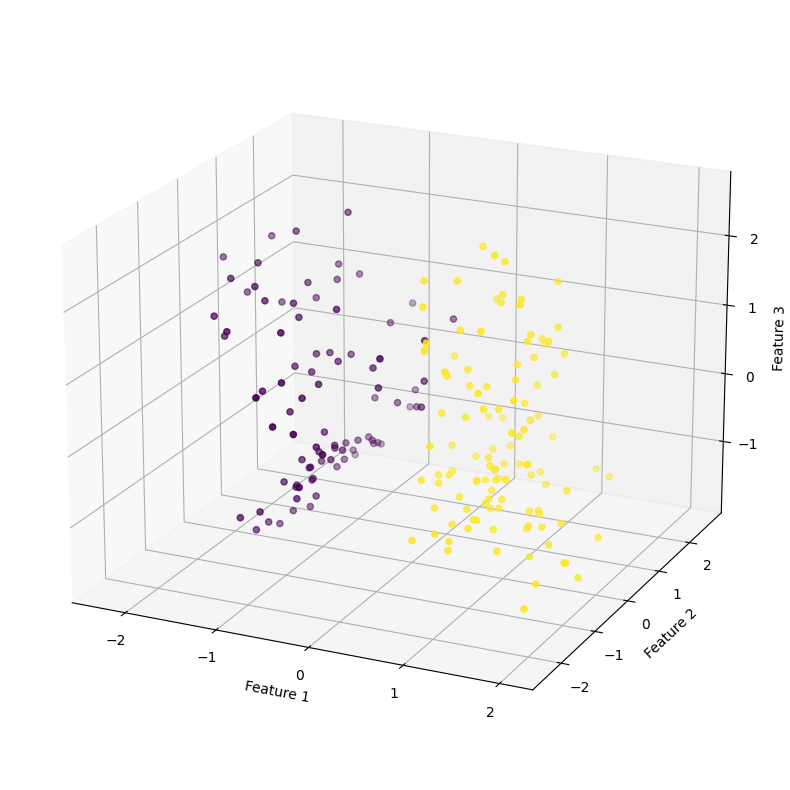

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Skapa en 3D-plot av testdatan
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Skapa en scatterplot med tre features 
ax.scatter(X_test['feature_1'], X_test['feature_2'], X_test['feature_3'], c=test_pred)
ax.view_init(elev=20, azim=-65)  # justera värdena efter behov


ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()
